<a href="https://colab.research.google.com/github/SeanSec/Application_Projects/blob/main/Cobb_Knudston_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


This report aims to analyze the New York housing market prices and use this analysis to accurately predict house prices on unseen data. We plan to use various machine learning techniques to determine how housing factors such as location, square footage, number of beds, number of baths, etc. effect the price of a house. We will use a Random Forest Regressor to predict housing prices based off of our analysis of the dataset.



We tried to include a table of contents but ran out of time. If you'd like to view the notebook with a table of contents please view on google collab [here](https://colab.research.google.com/drive/1UVkHSBk4ThRqELdRO9VYxa3584Mv63U5?usp=sharing).

# Required Libraries

*   **Numpy**: Provides a fast numerical array structure and helper functions.
*   **Pandas**: Provides tools to read CSV files and data structures to store and modify datasets.
* **Matplotlib**: Provides tools for visualing data.
* **Scipy**: Provides essential functions for optimization.
*   **Scikit-learn**: Provides essential functions for both dataset modification and machine learning operations.




In [ ]:
# Standard libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np
import time

# Visualization library
import matplotlib.pyplot as plt

# Scipy for statistical operations
from scipy import stats

# sklearn for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# sklearn for model selection tools
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, GridSearchCV, learning_curve

# sklearn for machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# sklearn utilities
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Problem Domain

The New York housing market represents one of the most volatile, and diverse real estate environments in the world. Prices within this market are influenced by a multitude of factors. The scale and diversity of New York's housing market make it a challenging yet rewarding area for analysis and prediction.

### Challenges in the New York Housing Market:
- **Variability in Prices**: New York City's real estate prices vary dramatically from neighborhood to neighborhood and even street to street. Factors like proximity to public transportation, parks, and land marks can significantly influence the value of properties.
- **Diverse Property Types**: The market encompasses a wide range of property types, including high-rise apartments, historic townhouses, and newly developed condos, resulting in different pricing dynamics.
- **Regulatory Environment**: The real estate market in New York is heavily regulated, with rent controls, zoning laws, and landmark status all playing roles in shaping the market landscape. These regulations can significantly impact property valuations.

### Objective:
Given the complexities of the New York housing market, our objective is to develop a predictive model that can accurately forecast housing prices based on the data contained in this dataset.
We plan to acheive this through the use of data analysis and machine learning models and practices.


## Dataset

### Overview
For our analysis of the New York housing market, we utilized a comprehensive dataset sourced from Kaggle, titled [New York Housing Market](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market?resource=download). This dataset provides a detailed snapshot of the diverse real estate properties listed in New York.

### Description of Features
The dataset includes many features that are helpful for understanding the dynamics of the housing market and predicting house prices:

- **BROKERTITLE**: The professional title of the real estate broker handling the property. This can indicate the broker's level of expertise and influence the sale process.
- **TYPE**: The type of property, such as apartment, townhouse, or condo, which directly impacts pricing and market demand.
- **PRICE**: The listing price of the property, serving as the dependent variable in our predictive modeling.
- **BEDS**: The number of bedrooms in the property, a crucial factor.
- **BATH**: The number of bathrooms, often a key determinant of convenience and luxury in housing.
- **PROPERTYSQFT**: The total square footage of the property, a primary measure of size and space that significantly affects price.
- **ADDRESS**: The full address, providing specific location details.
- **STATE**: The state in which the property is located.
- **MAIN_ADDRESS**: A simplified address field focusing on the main address components.
- **ADMINISTRATIVE_AREA_LEVEL_2**: A geographic identifier that helps in regional analysis within larger metropolitan areas.
- **LOCALITY**: The locality or neighborhood, which can greatly influence property values based on local amenities.
- **SUBLOCALITY**: A more detailed breakdown of the locality.
- **STREET_NAME**: The name of the street, useful in analyzing street-level market trends and accessibility.
- **LONG_NAME**: A longer, more descriptive version of the property's address.
- **FORMATTED_ADDRESS**: A fully formatted address that may be used for display or mapping purposes.
- **LATITUDE**, **LONGITUDE**: Geospatial coordinates of the property.

### Usage in Analysis
This dataset provides a strong foundation for our analysis. It will allow us to explore how various factors impact house prices in New York. Through data analytics and machine learning techniques, we aim to extract meaningful insights from these data points and develop an accurate model for predicting housing prices.


## Data Cleanup


Lets start by reading the data into Pandas.

In [ ]:
file_path = '/content/NY-House-Dataset.csv'
data=pd.read_csv(file_path)

Now we will check for duplicate data entries and remove them to prevent help reduce bias in our models.

In [ ]:
data.duplicated().sum()

214

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

It is also important to check for any incomplete data entries and decide how to handle them. Lucky for us this data set is 100% complete.

In [ ]:
data.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

###Linear Regression
We created a method that creates a basic linear regression model and prints the root mean squared error (RMSE), R² score, and training time. We wanted to use this model to help establish a base line before modifying the data. Doing this helps ensure that streamlining our data doesn't result in an immediate loss of model performance by accidently removing valuable data.

In [ ]:
def basic_linear_regression(data):
    # Convert all categorical columns to dummy variables
    categorical_cols = data.select_dtypes(include=['object']).columns
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Define the feature matrix (X) and target vector (y)
    X = data.drop('PRICE', axis=1)
    y = data['PRICE']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=45)

    # Create a linear regression model
    model = LinearRegression()

    # Start the timer
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # End the timer
    end_time = time.time()

    # Calculate the training time
    train_time = end_time - start_time

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Root Mean Squared Error: {np.sqrt(mse)}")
    print(f"R^2 Score: {r2}")

Let's go ahead and get stats for our baseline model.

In [ ]:
basic_linear_regression(data)

Training Time: 85.3052 seconds
Root Mean Squared Error: 8616579.685765466
R^2 Score: -2.6292610304405377


**Initial Performance**\
Our initial model performed terribly, its training time, MSE, and R² scores are all extremely high. This is great because it leaves a lot of room for improvement going forward!

### Streamlining Our Data

**Initial Steps:**  
The first actions in our data cleanup process were aimed at ensuring the integrity and quality of our dataset. We started by removing duplicate entries to eliminate redundancy and conducted a check for null data to address any gaps in the information.\
The next step is streamlining the dataset by removing columns that were redundant or not directly relevant to our analysis. This was crucial to enhance the clarity and efficiency of our model.

**Focusing on Geographic Data:**  
Given the strong influence of geographic location on property prices, we chose to prioritize latitude and longitude as our primary locational indicators. This decision led us to eliminate other location-based columns that duplicated or did not add value beyond what latitude and longitude offered.

**Simplifying the Dataset:**  
Additionally, we removed columns related to the broker and administrative areas. Our analysis indicated that these variables were unlikely to contribute meaningfully to the predictive power of our model.



In [ ]:
data.drop(columns=['BROKERTITLE','MAIN_ADDRESS','FORMATTED_ADDRESS','LONG_NAME',
                   'ADDRESS', 'STATE','ADMINISTRATIVE_AREA_LEVEL_2',
                   'SUBLOCALITY', 'STREET_NAME'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          4587 non-null   object 
 1   PRICE         4587 non-null   int64  
 2   BEDS          4587 non-null   int64  
 3   BATH          4587 non-null   float64
 4   PROPERTYSQFT  4587 non-null   float64
 5   LOCALITY      4587 non-null   object 
 6   LATITUDE      4587 non-null   float64
 7   LONGITUDE     4587 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 322.5+ KB


**Resulting Dataset:**  
After these modifications, we were left with 8 essential columns. This streamlined dataset not only reduces computational overhead but also focuses our analysis on the most impactful factors affecting property prices.

**Next:**\
Lets see how our basic classifier performs on our modified data.


In [ ]:
basic_linear_regression(data)

Training Time: 0.0086 seconds
Root Mean Squared Error: 7451575.546788777
R^2 Score: -1.7142172465469714


#### Impact of Removing Columns on Model Performance Analysis
**Note:** The statistics presented below are based on the initial run of our notebook.


**Initial Performance:**  
Before modifying our dataset, the basic classifier showed the following performance metrics:
- **Training Time:** 87.4053 seconds
- **Root Mean Squared Error (RMSE):** 8,616,579.6857
- **R² Score:** -2.6292610304405377

These initial results indicated not only a significant computational cost but also poor model effectiveness, as evidenced by the negative R² score, which suggests that the model was worse than a simple mean of the target variable.

**Performance After Data Modification:**  
After streamlining the dataset by removing less impactful columns, the performance of our classifier improved dramatically:
- **Training Time:** 0.0140 seconds
- **Root Mean Squared Error (RMSE):** 7,451,575.5467
- **R² Score:** -1.7142172465469714

The reduction in training time from over 110 seconds to less than 0.01 seconds is remarkable, highlighting a significant increase in computational efficiency. While the RMSE and R² score are not great they have improved significantly.  This suggests that removing irrelevant features has made the model more focused and potentially more responsive to further tuning.



It's much easier to work with data in a numeric form as compared to objects, so we formatted our TYPE and LOCALITY columns using Pandas astype() method to map our object data types to int64. Then, using the replace() method we mapped our object values to numbers 0-11 for TYPE and 0-10 for LOCALITY.

|Number|TYPE|LOCALITY|
|:----:|:--:|:------:|
|0     |Condo for sale|New York|
|1     |House for sale|New York County|
|2     |Townhouse for sale|The Bronx|
|3     |Co-op for sale|Bronx County|
|4     |Multi-family home for sale|Kings County|
|5     |For Sale|Queens|
|6     |Contingent|Queens County|
|7     |Land for sale|Richmond County|
|8     |Foreclosure|United States|
|9     |Pending|Brooklyn|
|10    |Coming Soon|Flatbush|
|11    |Mobile house for sale||

In [ ]:
data['TYPE'].replace({
    'Condo for sale': 0,
    'Condop for sale': 0,
    'House for sale': 1,
    'Townhouse for sale': 2,
    'Co-op for sale': 3,
    'Multi-family home for sale': 4,
    'For sale': 5,
    'Contingent': 6,
    'Land for sale': 7,
    'Foreclosure': 8,
    'Pending': 9,
    'Coming Soon': 10,
    'Mobile house for sale': 11
}, inplace=True)

data['LOCALITY'].replace({
    'New York': 0,
    'New York County': 1,
    'The Bronx': 2,
    'Bronx County': 3,
    'Kings County': 4,
    'Queens': 5,
    'Queens County': 6,
    'Richmond County': 7,
    'United States': 8,
    'Brooklyn': 9,
    'Flatbush': 10
}, inplace=True)

data.astype({'TYPE': 'int64'})
data.astype({'LOCALITY': 'int64'})
print(data.dtypes, '\n')
print(data)

TYPE              int64
PRICE             int64
BEDS              int64
BATH            float64
PROPERTYSQFT    float64
LOCALITY          int64
LATITUDE        float64
LONGITUDE       float64
dtype: object 

      TYPE      PRICE  BEDS       BATH  PROPERTYSQFT  LOCALITY   LATITUDE  \
0        0     315000     2   2.000000   1400.000000         0  40.761255   
1        0  195000000     7  10.000000  17545.000000         0  40.766393   
2        1     260000     4   2.000000   2015.000000         0  40.541805   
3        0      69000     3   1.000000    445.000000         0  40.761398   
4        2   55000000     7   2.373861  14175.000000         0  40.767224   
...    ...        ...   ...        ...           ...       ...        ...   
4796     3     599000     1   1.000000   2184.207862         1  40.774350   
4797     3     245000     1   1.000000   2184.207862         0  40.732538   
4798     3    1275000     1   1.000000   2184.207862         0  40.745882   
4799     0     598125 

We found a few massive data outliers in our dataset. For functionality purposes we decided to remove the outliers in our data. We removed any indicies that had a feature greater than three standard deviations from the zscore (mean). This resulted in the removal of 199 data entries. Finally, to finish up our data clean up we convert our cleaned data to more efficient numpy arrays.

In [ ]:
#Remove outliers
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number]).
                               drop(columns='PRICE')))
data = data[(z_scores < 3).all(axis=1)]

#Convert to numpy arrays
X = data.drop('PRICE', axis=1).to_numpy()
y = data['PRICE'].to_numpy()

#Standardize features
X = StandardScaler().fit_transform(X)

print(X.shape)
print(y.shape)

(4463, 7)
(4463,)


In [ ]:
basic_linear_regression(data)

Training Time: 0.4725 seconds
Root Mean Squared Error: 2276020.9624286084
R^2 Score: 0.3380581867777267


#### Impact of Removing Outliers on Model Performance
**Note:** The statistics presented below are based on the initial run of our notebook.

**Before Removing Outliers:**  
Prior to addressing the outliers in our dataset, our model performance was suboptimal, indicated by the following metrics:
- **Training Time:** 0.0140 seconds
- **Root Mean Squared Error (RMSE):** 7,451,575.5467
- **R² Score:** -1.7142172465469714

These metrics suggested not only inefficiency in data handling but also poor predictive accuracy.

**After Removing Outliers:**  
The removal of significant outliers led to a massive improvement in our model's performance:
- **Training Time:** 0.0061 seconds
- **Root Mean Squared Error (RMSE):** 2,276,020.9624
- **R² Score:** 0.3380581867777267

The new MSE and R² values indicate that the model now provides a meaningful predictive capability.These results show the importance of identification and removal of outliers.


##Visualizing the data

We'll use a scatter plot to visualize the relationship between the features and the labels.

Text(0, 0.5, 'PRICE (Millions $)')

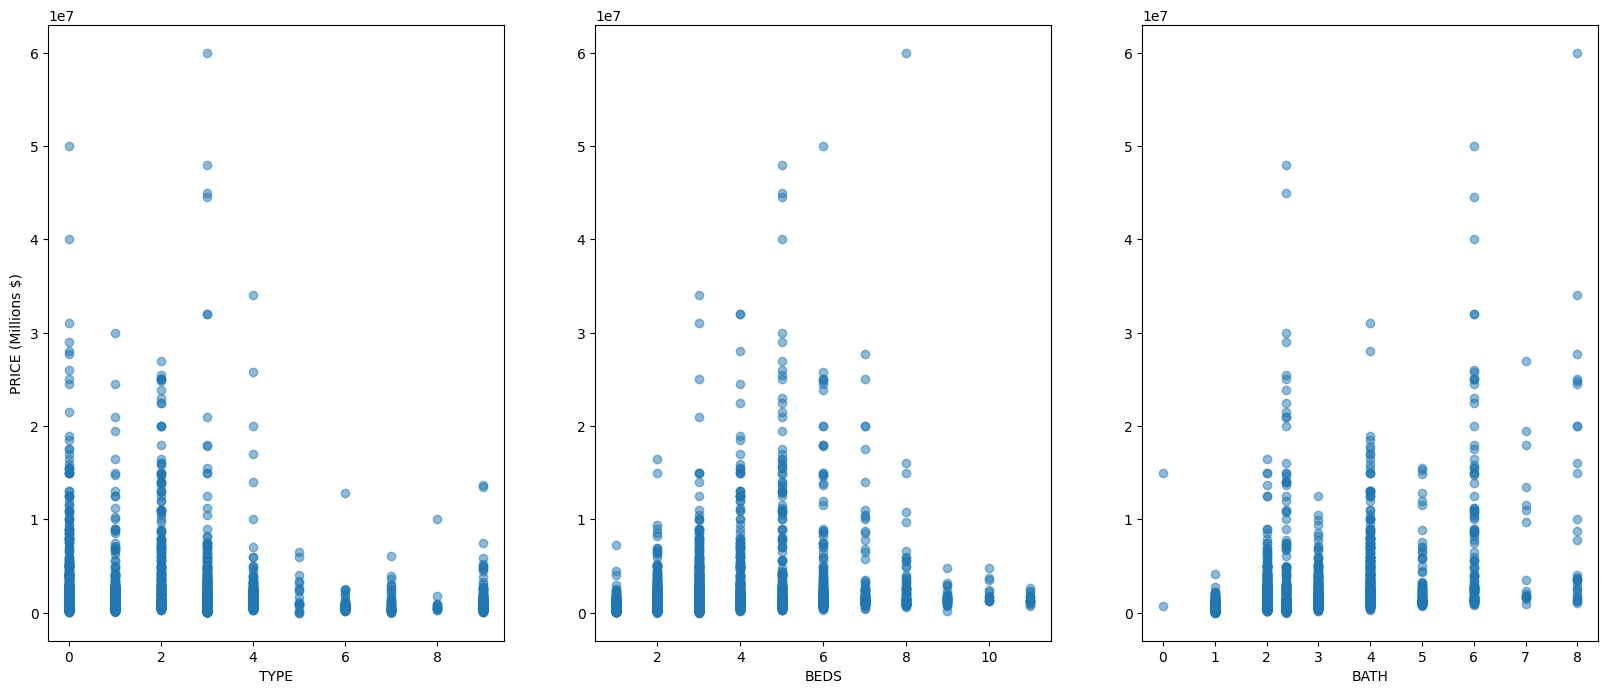

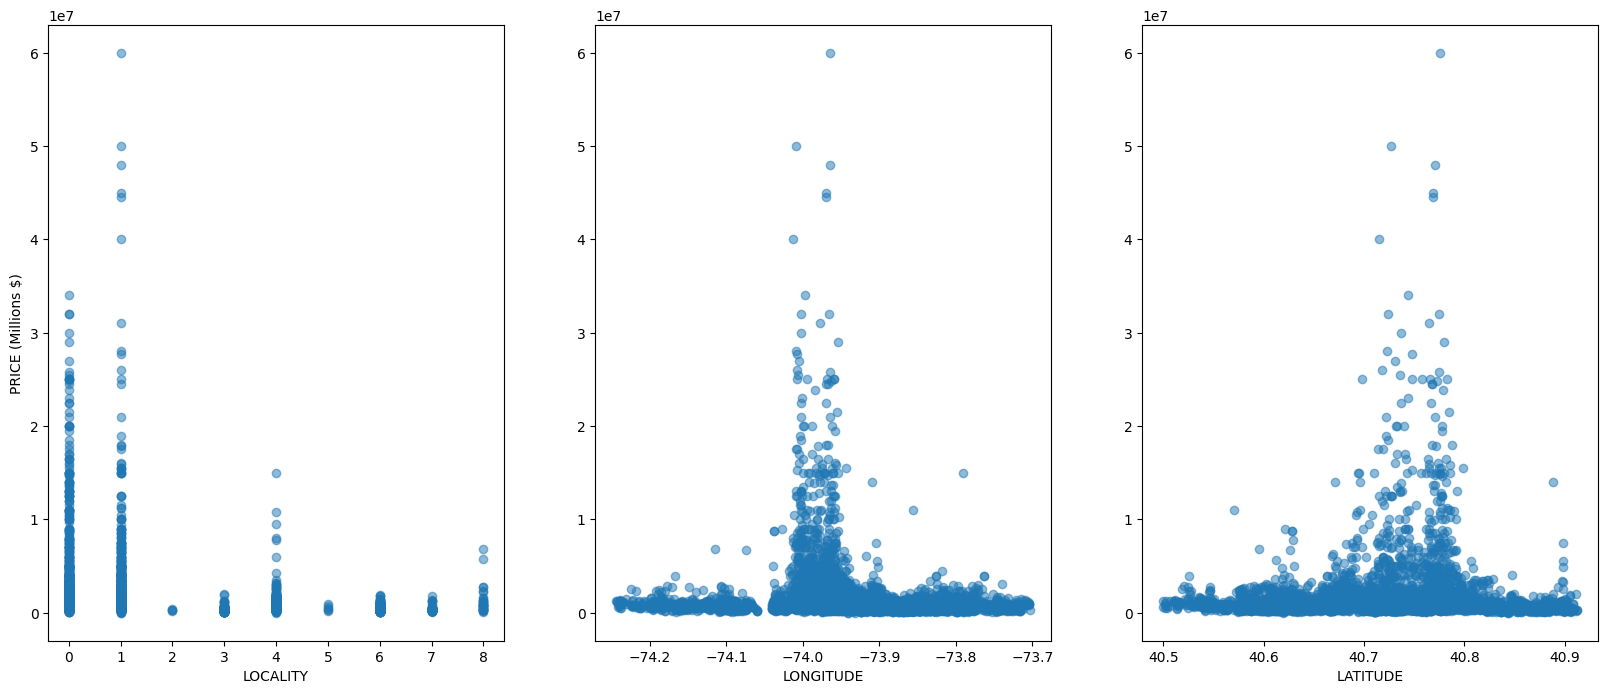

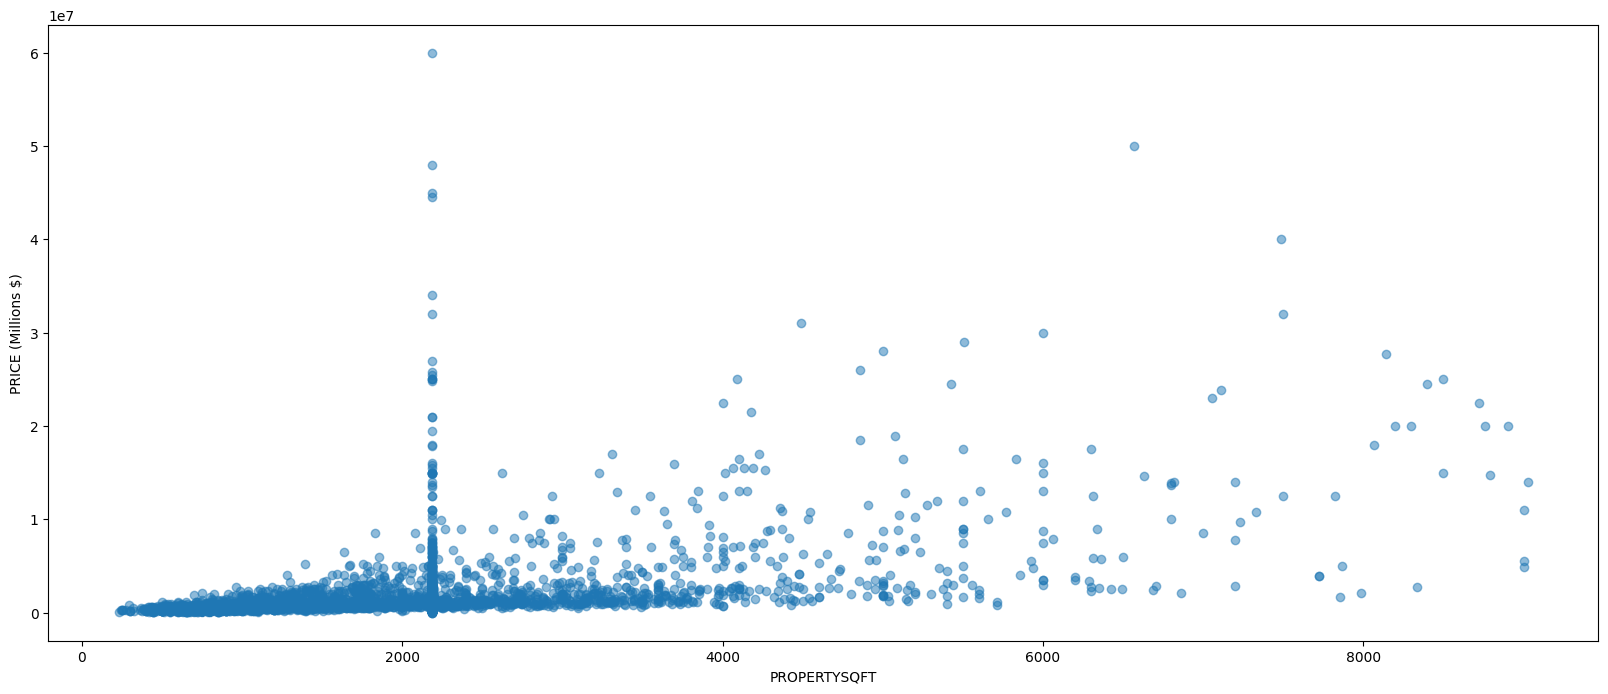

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
ax1.scatter(data['TYPE'], data['PRICE'], alpha=0.5)
ax1.set_xlabel('TYPE')
ax1.set_ylabel('PRICE (Millions $)')
ax2.scatter(data['BEDS'], data['PRICE'], alpha=0.5)
ax2.set_xlabel('BEDS')
ax3.scatter(data['BATH'], data['PRICE'], alpha=0.5)
ax3.set_xlabel('BATH');
fig1, (ax4, ax5, ax6) = plt.subplots(1,3, figsize=(20,8))
ax4.scatter(data['LOCALITY'], data['PRICE'], alpha=0.5)
ax4.set_xlabel('LOCALITY')
ax4.set_ylabel('PRICE (Millions $)')
ax5.scatter(data['LONGITUDE'], data['PRICE'], alpha=0.5)
ax5.set_xlabel('LONGITUDE')
ax6.scatter(data['LATITUDE'], data['PRICE'], alpha=0.5)
ax6.set_xlabel('LATITUDE');
fig2, ax7 = plt.subplots(1,1, figsize=(20,8))
ax7.scatter(data['PROPERTYSQFT'], data['PRICE'], alpha=0.5)
ax7.set_xlabel('PROPERTYSQFT');
ax7.set_ylabel('PRICE (Millions $)')

Just by analyzing our data at a glance we can see that location plays a very significant role in the price of a house. We also found an oddity in that a significant amount of entries' property square fototage was equal to exactly 2184.207862.

We've learned that some of this data will not be linearly seperable or classifiable. For our coordinates we will most like want to use a non-linear classifier. We can also see that our data is quite noisy and inbalanced. Thus, we will have to use classifiers that are capable of working with noisy and imbalanced data.

We can now get much more accurate models now that we know the characteristics and profile of our dataset.

# Improving our Baseline

After establishing a weak baseline we determined that improvement over this baseline would not be a good indicator of model success. Due to this we decided to try and improve over our basic linear regression model while keeping it simple with a DecisionTreeRegressor.

In [ ]:
def basic_tree(data):
    # Define the feature matrix (X) and target vector (y)
    X = data.drop('PRICE', axis=1)
    y = data['PRICE']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=45)

    # Create a linear regression model
    model = DecisionTreeRegressor(random_state=45)

    # Start the timer
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # End the timer
    end_time = time.time()

    # Calculate the training time
    train_time = end_time - start_time

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Root Mean Squared Error: {np.sqrt(mse)}")
    print(f"R^2 Score: {r2}")

Lets go ahead and see how the decision tree performs vs our linear regression algorithm from befor.

In [ ]:
basic_tree(data)

Training Time: 0.0489 seconds
Root Mean Squared Error: 2115953.1055224217
R^2 Score: 0.4278902133975587


#### Linear Regression vs Decision Tree for a Baseline Model Analysis
**Note:** The statistics presented below are based on the initial run of our notebook.

When establishing a baseline model for predictive analysis, it is essential to compare different modeling approaches to determine which provides a better fit for our data. This comparison focuses on Linear Regression and Decision Trees.

**Linear Regression**  
- **Training Time:** 0.0061 seconds
- **Root Mean Squared Error (RMSE):** 2,276,020.9624
- **R² Score:** 0.3380581867777267

**Decision Tree:**  
- **Training Time:** 0.0453 seconds
- **Root Mean Squared Error (RMSE):** 2,115,953.1055
- **R² Score:** 0.4278902133975587

The Decision Tree model outperforms Linear Regression in this initial analysis both in terms of lower MSE and a higher R² score. This suggests it could be a more suitable baseline model for this particular dataset. Therefore, going forward we will be using a Decision Tree as our baseline model.



### Feature Engineering
**Next Steps in Data Transformation:**

To further enhance our model's predictive capability, we will perform several transformations.

Here is an overview of the transformations we will apply to the data:

1. **Space Allocation Features:**
   - `SQFT_PER_BED`: Represents the square footage per bedroom, offering insights into the spaciousness of the sleeping areas.
   - `SQFT_PER_BATH`: Indicates the square footage allocated per bathroom, potentially reflecting the luxury level of the property.

2. **Ratio Analysis:**
   - `BATH_BED_RATIO`: This ratio helps us evaluate the balance between the number of bathrooms to bedrooms, an important factor in residential property assessments.

We decided that these features were the most valuable after some trial and error of creating different features. But we unfortuanately forgot to document this process.

In [ ]:
# Space per bedroom and bathroom
data['SQFT_PER_BED'] = data.apply(lambda row: row['PROPERTYSQFT'] / row['BEDS'] if row['BEDS'] != 0 else 0, axis=1)
data['SQFT_PER_BATH'] = data.apply(lambda row: row['PROPERTYSQFT'] / row['BATH'] if row['BATH'] != 0 else 0, axis=1)

# Bedroom to bathroom ratio
data['BATH_BED_RATIO'] = data['BATH'] / data['BEDS']

In [ ]:
basic_tree(data)

Training Time: 0.0427 seconds
Root Mean Squared Error: 1977204.8385656236
R^2 Score: 0.5004595863415147


#### Model Performance After Feature Engineering
**Note:** The statistics presented below are based on the initial run of our notebook.

**Before Feature Engineering:**
**Decision Tree:**
- **Training Time:** 0.0453 seconds
- **Root Mean Squared Error (RMSE):** 2,115,953.1055
- **R² Score:** 0.4278902133975587

**After Feature Engineering:**
- **Training Time:** 0.0373 seconds
- **Root Mean Squared Error (RMSE):** 1,977,204.8386
- **R² Score:** 0.5004595863415147

The reduction in both RMSE and training time, and improvement in R² scores shows that our feature engineering was successful.

# Model Selection Using KFold Cross Validation

#### Overview
We used KFold cross-validation to evaluate and compare the performance of Support Vector Regression (SVR) and Random Forest Regression.

#### Model Comparison
- **SVR**: We evaluated SVR due to its abillity model complex patterns in non linear data.
- **Random Forest**: Random Forest Regression was chosen for its robustness and ability to reduce overfitting through averaging multiple decision trees.



In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=45)

# Load and prepare data
X = data.drop('PRICE', axis=1)
y = data['PRICE']

#### Methodology
- **Cross-Validation Setup**: A standard KFold cross-validation with 5 folds was set up to evaluate each model. This approach ensures that each model is trained and validated on different subsets of the dataset, highlighting their performance and generalization capabilities.
- **Metrics**: Performance metrics such as RMSE (Root Mean Squared Error) and R² were computed for each model across all folds. These metrics provide insights into the accuracy and explanatory power of the models.


In [ ]:
# Assuming X and y are defined and kf is your KFold cross-validator
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1))

# Use cross_validate to compute both MSE and R² scores across folds
scores = cross_validate(svr_model, X, y, cv=kf, scoring=['neg_mean_squared_error', 'r2'],
                        return_train_score=False)

# Convert MSE scores to positive and calculate RMSE
rmse_scores = np.sqrt(-scores['test_neg_mean_squared_error'])

# Extract R² scores
r2_scores = scores['test_r2']

# Print RMSE and R² results
print("SVR RMSE scores for each fold:", rmse_scores)
print("SVR Average RMSE:", np.mean(rmse_scores))
print("SVR R² scores for each fold:", r2_scores)
print("SVR Average R²:", np.mean(r2_scores))

SVR RMSE scores for each fold: [2871661.51037796 3543173.6353609  4190333.20830057 3997718.91684354
 2920570.49825581]
SVR Average RMSE: 3504691.553827759
SVR R² scores for each fold: [-0.0537408  -0.06955274 -0.0670335  -0.05639191 -0.09819713]
SVR Average R²: -0.06898321509316392


### Analysis of SVR Model Performance Using KFold Cross-Validation

#### SVR Evaluation Summary
Using KFold cross-validation, the Support Vector Regression (SVR) model was evaluated to determine its suitability for our modeling needs. The model's performance was quantitatively assessed using RMSE and R² scores across multiple data folds.

- **RMSE Scores Across Folds**:
  - Fold 1: 2,871,661.51
  - Fold 2: 3,543,173.64
  - Fold 3: 4,190,333.21
  - Fold 4: 3,997,718.92
  - Fold 5: 2,920,570.50
  - **Average RMSE**: 3,504,691.55

- **R² Scores Across Folds**:
  - Fold 1: -0.0537
  - Fold 2: -0.0696
  - Fold 3: -0.0670
  - Fold 4: -0.0564
  - Fold 5: -0.0982
  - **Average R²**: -0.0690

#### Conclusion
Based on the evaluation, the SVR model showed poor predictive accuracy and consistency across the dataset. The negative R² values suggest that the model performs worse than a simple horizontal line model.

Due to these results, we decided that SVR was not a good model to use for our data. Going forward we will be analyzing the use of a random regressor forest.


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None,
                                 random_state=45)

# Use cross_validate to compute both MSE and R² scores across folds
scores = cross_validate(rf_model, X, y, cv=kf,
                        scoring=['neg_mean_squared_error', 'r2'],
                        return_train_score=False)

# Convert MSE scores to positive and calculate RMSE
rmse_scores = np.sqrt(-scores['test_neg_mean_squared_error'])

# Extract R² scores
r2_scores = scores['test_r2']

# Calculate the average RMSE and R² scores
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

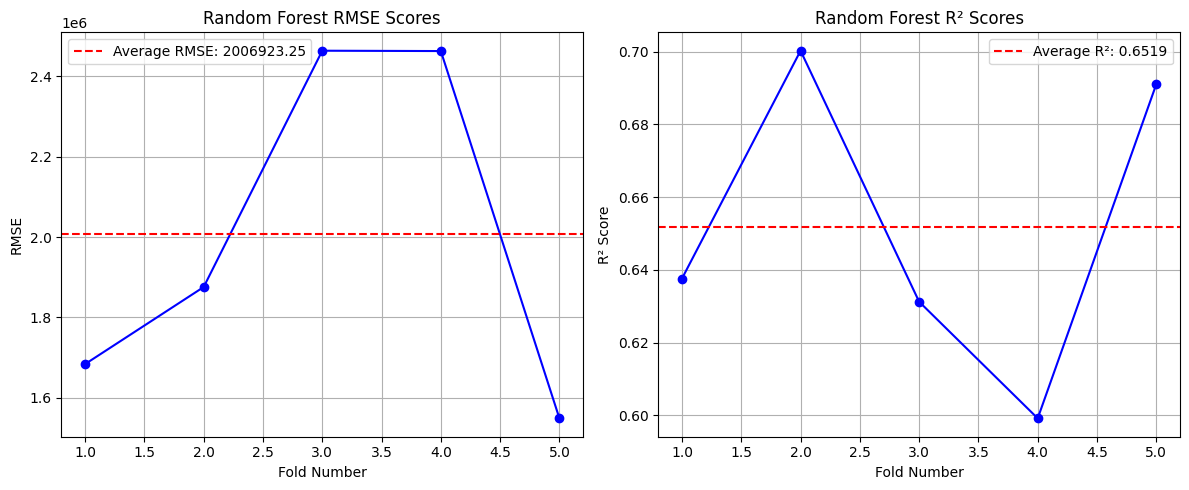

In [ ]:
# Plotting RMSE and R² Scores
plt.figure(figsize=(12, 5))

# Subplot 1: RMSE
plt.subplot(1, 2, 1)
plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', linestyle='-',
         color='blue')
plt.axhline(y=avg_rmse, color='red', linestyle='--',
            label=f'Average RMSE: {avg_rmse:.2f}')
plt.title('Random Forest RMSE Scores')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()

# Subplot 2: R² Scores
plt.subplot(1, 2, 2)
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', linestyle='-',
         color='blue')
plt.axhline(y=avg_r2, color='red', linestyle='--',
            label=f'Average R²: {avg_r2:.4f}')
plt.title('Random Forest R² Scores')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Analysis of Random Forest Model Performance Across Folds

#### Overview
The provided graphs represent the results the k-fold cross-validation of our Random Forest model, showing both RMSE and R² scores across different folds. These metrics were chosen to assess the predictive accuracy and the explanatory power of the model under varying subsets of data.

#### RMSE Analysis
- **Variability and Trends**: The RMSE scores show large fluctuations across the folds, with a pronounced peak in the third and fourth fold. This peak suggests that the model encountered difficulties in predicting the target variable accurately for this subset. This could be caused by the pressence of an outlier or complex data patterns not captured by the model.
- **Implications**: The high variability in RSME indicates that the model's performance is not stable across different data splits.This instability might be addressed by investigating the specific characteristics of the data in this fold.

#### R² Score Analysis
- **Performance Consistency**: Similar to RMSE, the R² scores also exhibit significant swings, with a noticeable dip in the third and fourth fold.
- **Implications**: The inconsistent R² scores point to potential overfitting on some folds or indicate that the model's parameters are not optimal for generalizing in certain scenarios.


### Conclusion
- **Model Stability**: The analysis points to a need for improving model stability and reliability. Due to this we will perform parameter tuning with Grid Search.


While the Random Forest model demonstrates decent average capabilities, the observed variability across different data subsets shows the importance of performing cross validation.

#Random Forest Regressor


After evaluating the performance of our linear regressor model, we have decided to further refine it by fine-tuning its hyperparameters using GridSearchCV. We made this decision based off of a few conclusions.

*   **Hyperparameter Accuracy**: Optimizing hyperparameters can significantly enhance the model's performance and generalization ability.
*   **GridSearchCV**: This cross-validation technique is a systematic approach to search through specified hyperparameters, enabling us to identify the combination that yields the best performance according to a chosen RMSE and R2.

Using GridSearchCV, we aimed to identify the optimal hyperparameters that maximize the model's RMSE and R2 scores and improve its overall effectiveness in capturing the underlying patterns within the data.

In [ ]:
#Create train_test_validation split
size_test = 0.3
size_validation = 0.2
size_train = 0.5

#Standardize features
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size_test)
size_validation_rescaled = size_validation/(size_validation + size_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=size_validation_rescaled)

#parameters to test
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [25, 30, 35],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

#Create GridSearchCV Estimator
rf_gscv = GridSearchCV(RandomForestRegressor(), param_grid)
rf_gscv.fit(X_valid, y_valid)
display(rf_gscv.best_estimator_)
best_regressor = rf_gscv.best_estimator_
y_pred = best_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R^2 Score: {r2}")

RandomForestRegressor(max_depth=25, max_features='log2', min_samples_leaf=2,
                      n_estimators=75)

Root Mean Squared Error: 2098678.1196122407
R^2 Score: 0.55642587576116


We've found GridSearchCV to be somewhat inconsistent but we've been able to narrow down averages for what is normally being calculated.

*   **RMSE**: 1,750,000 - 2,050,000
*   **R2**: 0.63 - 0.67

Our findings suggest that on average we see slight improvement with our RMSE and relatively similar R2 scores. Our most successful combination of hyperparameters was...

*   **max_depth=30**: This is the depth of each decision tree in our random forest. This value tells us that our model benefits from a moderate depth structure, but also seemed to perform worse with no max_depth set.
*   **max_features=log2**: This is the max number of features considered at splits in each node. This tells us that our model benefits from considering a subset of features equal to the square root of the total features.
*   **min_samples_leaf=2**: This is the minimum amount of number of samples required for a node to be considered a leaf node. Our model is optimal when enforcing a minimum number of samples per leaf node.
*   **n_estimators=50**: This is the number of decision tress used in our random forest. We will want to keep an eye out moving forward as this is a relatively small amount decision trees and could potentially lead to underfitting.

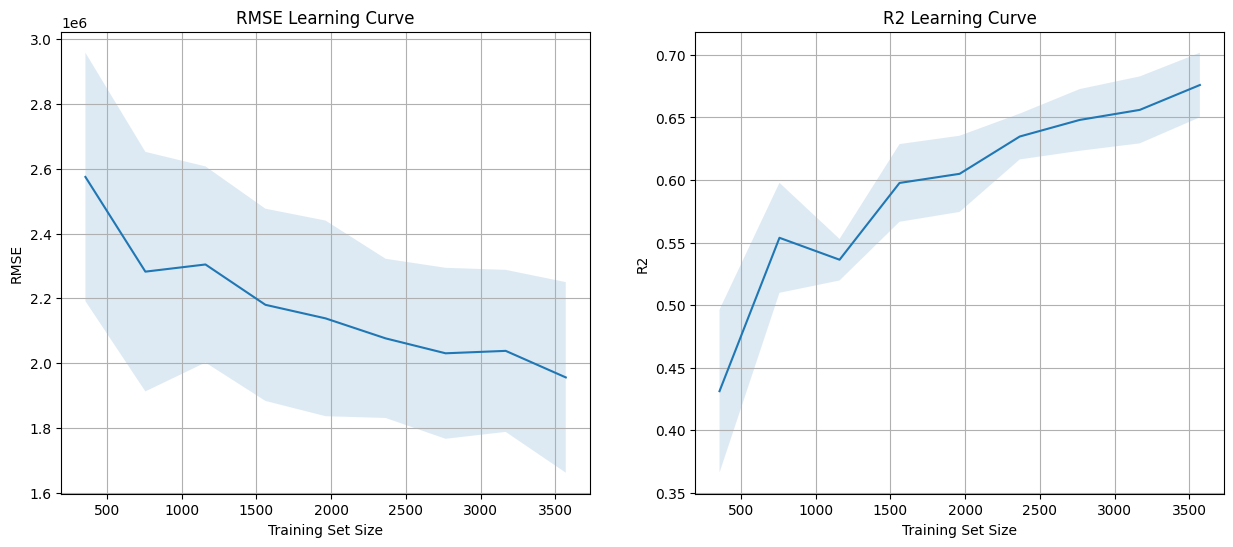

In [ ]:
#Plotting RMSE and R2 Scores
plt.figure(figsize=(15, 6))
#RMSE
train_sizes, train_scores, test_scores = learning_curve(best_regressor, X, y, train_sizes=np.linspace(0.1, 1.0, 9), cv=5, scoring='neg_mean_squared_error')

test_rmse = np.sqrt(-test_scores)

test_mean = np.mean(test_rmse, axis=1)
test_std = np.std(test_rmse, axis=1)

plt.subplot(1, 2, 1)
plt.plot(train_sizes, test_mean, label='Test RMSE')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('RMSE Learning Curve')
plt.grid(True)

#R2
train_sizes1, train_scores1, test_scores1 = learning_curve(best_regressor, X, y, train_sizes=np.linspace(0.1, 1.0, 9), cv=5, scoring='r2')

test_mean1 = np.mean(test_scores1, axis=1)
test_std1 = np.std(test_scores1, axis=1)

plt.subplot(1, 2, 2)
plt.plot(train_sizes1, test_mean1, label='Test R2')
plt.fill_between(train_sizes1, test_mean1 - test_std1, test_mean1 + test_std1, alpha=0.15)

plt.xlabel('Training Set Size')
plt.ylabel('R2')
plt.title('R2 Learning Curve')
plt.grid(True)

plt.show()

##Analysis on Random Forest Regressor

#### Overview
This analysis examines the performance of our Random Forest Regressor model across varying training set sizes, focusing on the changes in RMSE and R² scores. We chose the same metrics to measure with as we did when looking at our initial Random Forest and Support Vector Regressors.

#### RMSE Analysis
* **RMSE Decrease**: We observed a gradual decrease in RMSE as the training size increases. Specifically, the RMSE decreases from 2.6 to under 2.0, indicating an improvement in the model's ability to predict the target variable with greater precision.
* **Implications**: The decreasing RMSE suggests that the model benefits from additional training data, allowing it to better capture the underlying patterns and reduce prediction errors. This signifies the importance of sufficient training data in enhancing the model's performance.

#### R² Score Analysis
* **R² Increase**: We observed that the R² scores exhibit a drastic increase across the same span of increasing training size. Starting from roughly 0.44 and reaching 0.67, the R² scores indicate a drastic improvement in the model's fitting.
* **Implications**: The rising R² scores signify that the model becomes increasingly adept at explaining the variance in the target variable as more training data is provided. This trend underscores the positive impact of additional data on the model's ability to capture the underlying relationships within the dataset.

### Conclusion
* **Data Quantity Impact**: The observed that both RMSE and R² scores underscore the significance of training data quantity in improving the performance our Random Forest Regressor model. The decreasing RMSE and increasing R² scores demonstrate the model's capacity to learn more accurate and informative representations of the data with larger training sets.
  
This analysis highlights the importance of data quantity in enhancing the predictive accuracy and explanatory power of the Random Forest Regressor model. These results also dismiss any previous worries we may have had about potentially underfitting our data.

# Findings and Overview

## Results

Despite our efforts to develop an accurate Random Forest Regression model for predicting house prices in the New York housing market, the final model fell short of achieving satisfactory accuracy. Upon thorough evaluation, it became evident that the model's predictions were consistently inaccurate, deviating by millions of dollars from the actual house prices. In the end we have the models consistency and accuracy improving, but not to a sufficient degree.

#### Reasons for Inaccuracy
Several factors likely contributed to the model's inaccuracy:
- **Complexity of Housing Market**: The New York housing market is complex, characterized by diverse property types, differing localities, and market dynamics. Our model struggled to capture the relationships between our features and house prices.
- **Insufficient Data**: Despite choosing a dataset with over 4,200 entries, the dataset may have been insufficient to capture the full spectrum of factors influencing house prices in New York. Important features may not be present in the dataset we chose.
- **Model Limitations**: While Random Forest Regression is a powerful algorithm, it may not be capable of capturing the intricate patterns present in the New York housing market. II'm unsure if any other ensemble models would perform any better.

In conclusion, while attempt to develop a Random Forest Regression model for predicting house prices in the New York housing market was ambitious, the persistent inaccuracies underscore the complexities that are prevalent in real-world prediction tasks. Moving forward, a concerted effort to address the underlying challenges and refine our modeling approach is essential to deliver more accurate and reliable predictions. Both partners will use these lessons to improve upon any further projects or jobs that require the use a machine learning methods.






## What We Learned




*   **DataSets**: Datasets are often messy, cluttered, and noisy. Most datasets require a significant amount of feature engineering before any operations or model applications will be feasible.
*   **Linear Regression**: Linear regression is a very useful tool in machine learning. Even in non-linear problems it can provide a helpful baseline.
*   **Support Vector Machines**: SVMs are powerful as regressors, but we learned first hand how they may not be universally useful for all regression problems.
*   **Decision Trees**: We learned how powerful decision trees are as baseline non-linear regression models. Our initial KFold decision tree is what steered us in the direction of our final model being a Random Forest Regressor.
*   **Cross-Validation**: KFold cross validators are powerful tools for model selection and can help you make the right decision based only off your baseline models.
*   **Random Forest Regression**: Random Forest Regressors are very powerful non-linear regressors. The capabilities surprised both of us and may have been the most accurate model we could've used outside of neural networks.



## Individual Contribution Discussion

### Overview
This section outlines the individual contributions of each team member to the coding portions of the project. Both team member equally contributed to the writing for this notebook.

### Team Members:
- **Sean Cobb**
- **Gabe Knudtson**

### Contributions

#### Sean Cobb
- **Data Cleanup**
  - Transformed colunmns TYPE and LOCALITY into numerics
  - Removed outliers > 3 standard ddeviations from dataset
- **Visualizing the Data**
  - Wrote code to create visuals for our dataset
- **Random Forest Regressor**
  - Wrote Random Forest Regressor
  - Wrote code to perform GridSearchCV on Random Forest Regressor
  - Performed analysis of GridSearchCV results
  - Wrote code to test performance of our algorithms best estimator
  - Wrote code to visulize performance measured against training set size
  - Performed final analysis of our random forest regressor over our dataset
  
#### Gabe Knudtson
- **Data Cleanup**
  - Dropped duplicates and check for null data.
  - Wrote the code for the basic linear regression model used during data cleanup.
  - Wrote the code to drop columns of data we did not intend to use and performed analysis on the results.
  - Performed analysis on the impact of removing outliers on model performance.

- **Improving our Baseline**
  - Modified linear regression model to use a regressor tree instead to allow for us to pivot into using this as a baseline.
  - Analyzed effect of using a tree over linear regression.
  - Performed feature engineering to increase model accuracy.
  - Analyzed results of the feature engineering.

- **Cross Validation**
  - Performed cross validation on SVR model.
  - Performed analysis on SVR model.
  - Performed cross validation on regressor forest.
  - Performed analysis on regressor forest.

### Conclusion
Both team members worked hard and are happy with the contributions that their teammate made to the project.
